# Les 2: Modellen

Nadat we in de vorige les hebben geleerd hoe je met behulp van statistiek analyses kunt doen van je data, gaan we in deze les de computer aan het werk zetten om de geleerde analysetechnieken in te zetten om voorspellingen te doen.

Dat is immers waar het bij Data Science allemaal om draait: de computer leren patronen te herkennen in onze data zodat het nemen van beslissingen zoveel mogelijk kan worden geautomatiseerd.

De volgende onderwerpen komen in dit notebook aan bod:

- Correlaties
- Lineaire regressie-analyse
- Clustering
- Decision trees
- Ensemble models


## Uitvoeren op Google Colab

Dit notebook kan worden uitgevoerd op Google Colab. Hiervoor is een Google-account vereist.

Klik op de knop "Open in Google Colab" om het notebook te openen in Google Colab:


<a href="https://colab.research.google.com/github/mcdejonge/beginnen_met_data_science/blob/main/les_2_modellen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In het codeblok hieronder worden alle bibliotheken ingeladen die in dit notebook worden gebruikt.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## 2.1 Correlaties en lineaire verbanden

Voordat we de computer echt aan het werk kunnen zetten, moeten we ons repertoire aan statistische kennis nog iets verder uitbreiden. We moeten weten hoe je vast kunt stellen dat er een verband bestaat tussen twee variabelen.

Stel, we meten elke dag wat de gemiddelde temperatuur per dag is. Dat is onze eerste variabele. Daarnaast houden we per dag bij hoeveel ijsjes er zijn verkocht - onze tweede variabele. Waar we uiteindelijk naartoe willen, is een model dat geheel automatisch voor ons op basis van de weersverwachting voor de komende dagen kan voorspellen hoeveel ijsjes er verkocht gaan worden. Een dergelijk model is bijvoorbeeld handig voor uitbaters van strandtenten, ijsfabrikanten enzovoort.

Laten we om te beginnen eens kijken naar onze data. Omdat er twee kolommen (variabelen) zijn, kunnen we een scatterplot maken om het verband tussen de variabelen in beeld te brengen.

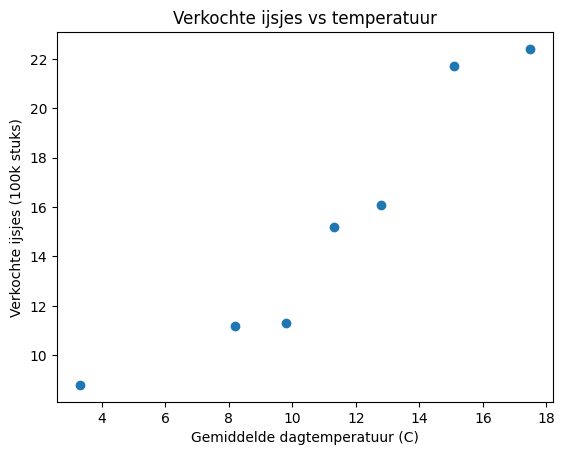

In [5]:
# We maken een nieuw dataframe met fictieve gegevens over het aantal
# verkochte ijsjes (per 100k) en de gemiddelde temperatuur (in graden Celcius)
dfijsjes = pd.DataFrame({
    'temperatuur' : [3.3, 8.2,  9.8,  11.3, 12.8, 15.1, 17.5],
    'ijsjes' :      [8.8, 11.2, 11.3, 15.2, 16.1, 21.7, 22.4]
})

# We maken een scatterplot van ons dataframe om het verband tussen de
# twee variabelen in beeld te brengen.
plt.scatter(dfijsjes['temperatuur'], dfijsjes['ijsjes'])
# Vanaf nu gaan we onze grafiekjes ook netjes labelen zodat onmiddellijk duidelijk is waar we naar kijken.
plt.title('Verkochte ijsjes vs temperatuur')
plt.ylabel('Verkochte ijsjes (100k stuks)')
plt.xlabel('Gemiddelde dagtemperatuur (C)')
plt.show()

Er lijkt een duidelijk verband te zitten tussen de gemiddelde dagtemperatuur en het aantal verkochte ijsjes. Verder lijkt het erop alsof dat verband *lineair* is - dat wil zeggen dat je een rechte lijn zou kunnen trekken door alle datapunten heen waarbij de afstand tussen die lijn en de datapunten klein blijft.

Het trekken van zo'n lijn is een werkje dat je beter door een computer kunt laten doen (er komt erg veel - op zichzelf eenvoudig - rekenwerk bij kijken). Hoe je dit precies doet, komt aan bod in paragraaf 2.2, "Ons eerste model: lineaire regressie". Voor nu is het voldoende als we op het oog herkennen dat je een rechte lijn zou *kunnen* trekken door deze datapunten.


Wat we wél gaan doen, is de computer laten uitrekenen hoe *sterk* het lineaire verband is tussen de twee variabelen.

Een andere term voor "verband tussen twee variabelen" is *correlatie*, vandaar dat we meestal zeggen dat we de *correlatie* gaan berekenenen tussen twee variabelen.

In Python gaat dat heel eenvoudig:

In [6]:
dfijsjes['ijsjes'].corr(dfijsjes['temperatuur'])

np.float64(0.9482947145707615)

De berekende correlatie is `0,94`. Dat is enorm hoog - doorgaans zijn we al tevreden met een correlatie van `0.7`. In de sociale wetenschappen en ook in bedrijfskundig onderzoek zijn zelfs nóg lagere correlaties gebruikelijk.

De oorzaak voor deze hoge correlatie is natuurlijk dat de gebruikte data kunstmatig is en speciaal gemaakt is om uit te leggen wat correlaties en lineaire verbanden zijn.

Hieronder zien we een voorbeeld van twee variabelen waar juist helemaal geen verband tussen bestaat (beide reeksen cijfers zijn volkomen willekeurig gegenereerd). 

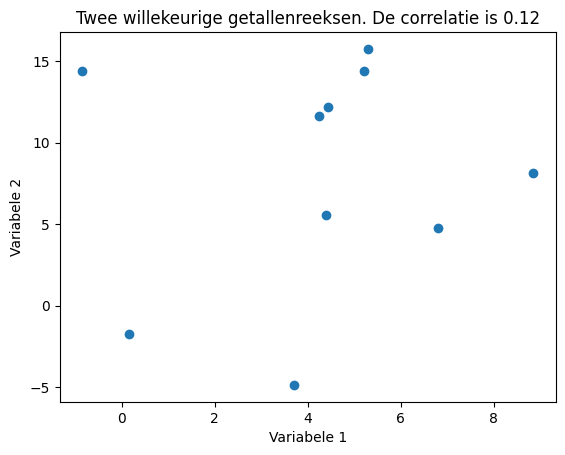

In [7]:
# Hoe deze code werkt, is voor nu niet zo interessant. Het gaat om de grafiek.
np.random.seed(39)
dfrandom = pd.DataFrame({
    # Maak 2 reeksen van willekeurig gegenereerde maar normaal verdeelde getallen.
    'var1' : np.random.normal(4, 2, 10),
    'var2' : np.random.normal(6, 8, 10)
})
plt.scatter(dfrandom['var1'], dfrandom['var2'])
plt.title(f"Twee willekeurige getallenreeksen. De correlatie is {dfrandom['var1'].corr(dfrandom['var2']):.2f}")
plt.xlabel('Variabele 1')
plt.ylabel('Variabele 2')
plt.show()


We zien datapunten die willekeurig over de grafiek zijn verdeeld (wat logisch is, aangezien ze willekeurig zijn gegenereerd). De correlatie is dan ook laag: `0,12`, wat zoveel betekent als: *geen correlatie van betekenis*.

Het is op zich mogelijk om een lijn te trekken door deze datapunten, maar elk datapunt zou dan erg ver van de lijn liggen. De betekenis van de lijn (het lineaire verband) is dan niet groot.

### 2.1.1 Wat is de betekenis van een hoge correlatie?

Wat een hoge correlatie precies betekent, hangt af van het soort data waarvoor je de correlatie berekent.

In het voorbeeld van de temperatuur en het aantal verkochte ijsjes betekent een hoge correlatie: "als de gemiddelde dagtemperatuur omhoog gaat, stijgt het aantal verkochte ijsjes".

Rekenkundig gezien geeft de waarde voor de correlatie, de zogenoemde *correlatie-coëfficiënt* weer *welk deel* van de verandering in de ene variabele (`b`) verklaard wordt door een verandering in de andere variabele (`a`). Is de correlatie-coëfficiënt 1, dan veroorzaakt elke verandering in variabele `a` een precies even grote verandering in variabele `b`. Is de correlatie-coëfficiënt 0.5, dan verklaart elke verandering in variabele `a` de *helft* van de verandering in variabele `b` en is de correlatie-coëfficiënt 0 dan hebben veranderingen in `a` en `b` helemaal niets met elkaar te maken.

**Belangrijk** hoewel we zeggen dat veranderingen in `a` veranderingen in `b` "verklaren", betekent dat *niet* dat correlatie een oorzaak-gevolg relatie aanduidt. Het is nadrukkelijk niet zo dat je kunt stellen dat een hogere temperatuur een grotere ijsverkoop *tot gevolg* heeft - je kunt alleen zeggen dat een hogere temperatuur *samenhangt* met een grotere ijsverkoop.

Een voorbeeld om dit te verduidelijken is bijvoorbeeld het volgende: stel dat we alleen gegevens hebben over het aantal verkochte ijsjes én over het aantal keren dat de reddingsbrigade uit moet varen op een dag. Ook tussen deze twee variabelen is de correlatie sterk en waarschijnlijk vrijwel net zo sterk als tussen het aantal verkochte ijsjes en de gemiddelde temperatuur. Toch zal het onmiddellijk duidelijk zijn dat er niet meer ijsjes worden verkocht alleen omdat er ergens in Scheveningen een boot met reddingswerkers de zee op gaat.

We zeggen daarom ook wel: **correlatie is geen causaliteit** (causaliteit: een *oorzakelijk* verband).

### Opgave

In les 1 hebben we door onze oogharen gekeken naar het verband tussen snavellengte (`culmen_length_mm`) en zwemvlieslengte (`flipper_length_mm`). We dachten een lineair verband te kunnen zien.

Nu gaan we berekenen hoe sterk dat verband is. Lees de pinguin-data in (`data/palmerpenguins/penguins_size_clean.csv`) en laat Python de correlatie-coëfficiënt berekenen voor de kolommen `culmen_length_mm` en `flipper_length_mm`.

In [ ]:
# Inlezen van penguin-data. 
if 'COLAB_GPU' in os.environ:
    dfpenguins = pd.read_csv("https://raw.githubusercontent.com/mcdejonge/beginnen_met_data_science/refs/heads/main/data/palmerpenguins/penguins_size_clean.csv")
else:
    dfpenguins = pd.read_csv("data/palmerpenguins/penguins_size_clean.csv")

In [ ]:

# Plaats hier je voorbeeldcode.


## 2.2 Het eerste model: lineaire regressie

Nu we hebben vastgesteld dat er een sterke correlatie is tussen de gemiddelde temperatuur en de hoeveelheid verkochte ijsjes, kunnen we de computer inzetten om ons te helpen voorspellen hoeveel ijsjes er morgen verkocht gaan worden gegeven de verwachte gemiddelde dagtemperatuur (die je natuurlijk bij het KNMI kunt opvragen).

We weten ook dat het verband lineair is: hoe hoger de gemiddelde temperatuur, hoe meer ijsjes er verkocht worden.

Wat we de computer zouden willen vragen, is om voor ons een *model* te maken van dit lineaire verband. Zo'n model is een stuk software waarin zo'n verband is vastgelegd en waarmee je voorspellingen kunt doen, in ons geval door er een verwachte temperatuur in te stoppen waarna er een verwacht aantal verkochte ijsjes uitrolt.

De Python-bibliotheek `scikit-learn` bevat allemaal gereedschap om dit soort modellen te maken. Hieronder gebruiken we de functie "LinearRegression" om een lineair model te maken.


In [9]:
# Maak een nieuw, leeg lineair model aan
model = LinearRegression() 

# Geef het model onze data zodat het kan uitrekenen wat precies 
# het verband is tussen de temperatuur en het aantal verkochte ijsjes.
model.fit(dfijsjes[['temperatuur']], dfijsjes[['ijsjes']])

# Nu het model weet wat het verband is, kunnen we voorspellingen doen.
# Hoeveel ijsjes (x 100k) gaan we verkopen als de gemiddelde temperatuur
# 30 graden is?.
# Merk op dat modellen alleen met dataframes overwegkunnen. 
# We moeten onze temperatuur dus in een dataframe stoppen.
model.predict(pd.DataFrame({'temperatuur' : [30]}))


array([[35.45067488]])

Helaas kan `LinearRegression` niet zonder meer eenvoudige reeksen getallen overweg. Dit verplicht ons om een paar extra bewerkingen te doen voordat we het model onze data geven. Dat is waarom we het model niet `dfijsjes['temperatuur]` geven maar `dfijsjes[['temperatuur']]` (hetzelfde geldt voor `dfijsjes['ijsjes']`).

Om dezelfde reden kunnen we het model niet het aantal verkochte ijsjes laten voor spellen voor één enkele temperatuur maar moeten we die ene temperatuur in een dataframe stoppen. Het resultaat is eveneens niet een enkel getal of zelfs een lijst met getallen maar een lijst met lijsten van getallen oftewel in dit geval een getal tussen *twee* sets blokhaken (`[[30]]`).

In de praktijk is dit geen probleem, omdat je altijd met grotere hoeveelheden gegevens werkt, maar voor dit eerste voorbeeld is er dus wat extra werk nodig.

In ieder geval kunnen we nu zien hoeveel ijsjes er worden verkocht als de gemiddelde dagtemperatuur 30 graden is. Voor ijsjesfabrikanten en uitbaters van strandtenten is dit natuurlijk buitengewoon nuttig om te weten.


### 2.2.1 Hoe goed presteert een lineair model?

Voordat een ijsjesfabrikant op basis van een lineair model nieuwe machines gaat bestellen, is het van belang  te weten hoe *goed* de voorspellingen van dat model eigenlijk zijn.

Hiervoor heeft een `LinearModel` de functie `score` aan boord. Deze functie berekent een numerieke waarde die weergeeft hoe ver de voorspellingen van het model afwijken van de werkelijkheid.

Hieronder zien we een voorbeeld.

Stel dat we gegevens hebben over de verkoop van ijsjes voor gemiddelde dagtemperatuur die het lineaire model nog niet eerder heeft gezien. Waar we benieuwd naar zijn is hoe ver de voorspellingen van het model voor de dagtemperaturen in kwestie afwijken van de daadwerkelijke aantallen verkochte ijsjes. 

Hier zijn de waarden die we willen testen:

| Temperatuur | Aantal ijsjes x 100k |
|-------------|----------------------|
| 14          | 15,8                 |
| 18          | 23                   |
| 20          | 24                   |

We gaan met model vragen om de score te berekenen op basis van deze waarden. Hoeveer zat het model er bij het voorspellen naast?

In [65]:
# Maak opnieuw een nieuw, leeg lineair model aan en vul het met data.
model = LinearRegression() 
model.fit(dfijsjes[['temperatuur']], dfijsjes[['ijsjes']])

# Maak een dataframe met de waarden die we willen testen.
testwaarden = pd.DataFrame({
    'temperatuur' : [14, 18, 20],
    'ijsjes' : [15.8, 23,24]
})
# Bereken de afwijking tussen de voorspelde waarden en de echte.
model.score(testwaarden[['temperatuur']], testwaarden[['ijsjes']])


0.82562200830573

De methode `score` berekent de zogenoemde R2 waarde (R Squared). Dit is in dit geval dezelfde meetwaarde als de correlatie-coëfficiënt die we eerder zagen.

De berekende score is lager dan de correlatie-coëfficient maar dat is logisch omdat de score is gebaseerd op data die het model nog niet eerder gezien heeft.

De score is echter wel heel hoog. Net als bij de correlatie-coëfficient geldt een waarde groter dan `0,7` als "zeer goed".

Overigens is het mogelijk om een lineair model waar één variabele wordt voorspeld op basis van één andere variabele in beeld te brengen. De techniek daarvoor valt buiten de stof van deze les, dus de precieze werking van deze  code is voor nu verder niet belangrijk, maar voor dit model ziet de lijn er zo uit:



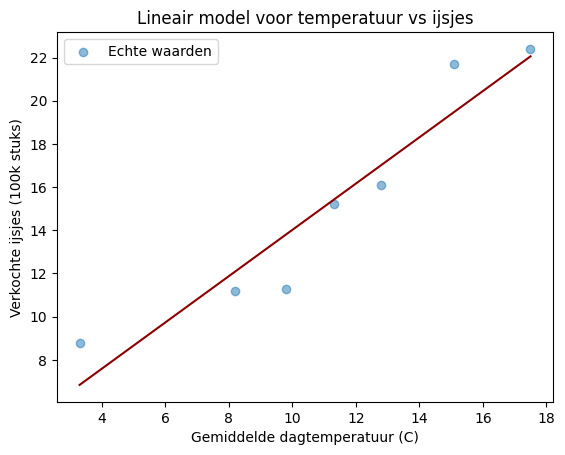

In [67]:
fig, ax = plt.subplots()
plt.scatter(dfijsjes['temperatuur'], dfijsjes['ijsjes'], alpha=0.5)
plt.plot(dfijsjes['temperatuur'], model.predict(dfijsjes[['temperatuur']]), color='darkred')
ax.set_title("Lineair model voor temperatuur vs ijsjes")
plt.ylabel('Verkochte ijsjes (100k stuks)')
plt.xlabel('Gemiddelde dagtemperatuur (C)')
ax.legend(['Echte waarden'])
plt.show()

### 2.2.2 Wat als het verband niet lineair is?

Veel verbanden in de echte wereld zijn lineair - of in ieder geval lineair genoeg om voorspellingen te kunnen doen met een lineair model. Voor veel andere verbanden geldt dat echter niet.

Hier is bijvoorbeeld opnieuw een scatterplot voor het aantal verkochte ijsjes vs de gemiddelde dagtemperatuur, maar nu uitgebreid met wat extra observaties.

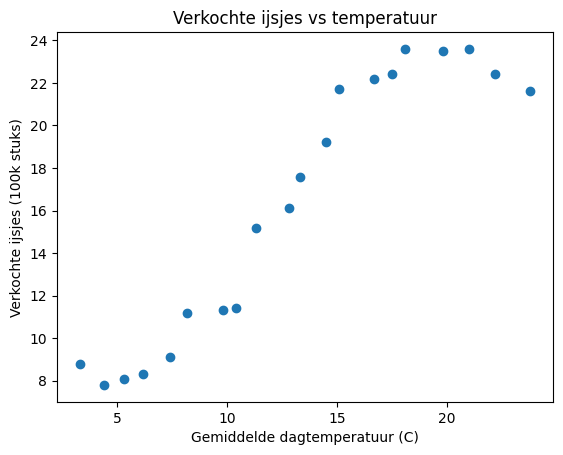

In [10]:
# We maken een nieuw dataframe met extra gegevens over het aantal
# verkochte ijsjes (per 100k) en de gemiddelde temperatuur (in graden Celcius)
dfijsjes = pd.DataFrame({
    'temperatuur' : [3.3, 4.4, 5.3, 6.2, 7.4, 8.2,  9.8,  10.4, 11.3, 12.8, 13.3, 14.5, 15.1, 16.7, 17.5, 18.1, 19.8, 21.0, 22.2, 23.8 ],
    'ijsjes' :      [8.8, 7.8, 8.1, 8.3, 9.1, 11.2, 11.3, 11.4, 15.2, 16.1, 17.6, 19.2, 21.7, 22.2, 22.4, 23.6, 23.5, 23.6, 22.4, 21.6]
})

# We maken een scatterplot van ons dataframe om het verband tussen de
# twee variabelen in beeld te brengen.
plt.scatter(dfijsjes['temperatuur'], dfijsjes['ijsjes'])
# Vanaf nu gaan we onze grafiekjes ook netjes labelen zodat onmiddellijk duidelijk is waar we naar kijken.
plt.title('Verkochte ijsjes vs temperatuur')
plt.ylabel('Verkochte ijsjes (100k stuks)')
plt.xlabel('Gemiddelde dagtemperatuur (C)')
plt.show()

We zien dat het aantal verkochte ijsjes redelijk gelijkblijft tot 7,5 graden, dan sterk stijgt en vanaf 17,5 graden afvlakt (en zelfs iets daalt). Wanneer we voor deze dataset een lineair model zouden gebruiken, dan zou het voorspelde aantal verkochte ijsjes op hele warme dagen (een daggemiddelde van meer dan 22 graden) waarschijnlijk veel te hoog zijn (en wellicht voor dagen met een laag daggemiddelde juist te laag).

Het is dan ook van belang om goed te begrijpen hoe lineair de data is en wat de gevolgen zijn van een verkeerde voorspelling voordat je aan de slag gaat met een lineair model.

### Opgave

1. Gebruik de pinguindata uit de vorige opgave. Maak een lineair model dat op basis van de zwemvlieslengte  (`flipper_length_mm`) de snavellengte (`culmen_length_mm`) voorspelt.
2. Bereken de score van het model. Hiervoor kun je de dataset zelf gebruiken. Dit vertelt je hoe sterk de voorspellingen van het model afwijken van de echte waarden.
3. Wat valt op? Is het resultaat wat je had verwacht?



In [80]:
# Plaats hier je eigen code


## 2.3 Het tweede model: clustering

Lineaire modellen zijn nuttig voor gevallen waarin je wil voorspellen hoe *groot* een bepaalde wordt als je een andere waarde aanpast (bijvoorbeeld *hoeveel* ijsjes je gaat verkopen als de gemiddelde dagtemperatuur wijzigt) oftewel waarin de te voorspellen waarde een *getal* is.

Er zijn echter ook gevallen waarin de waarde die je wil voorspellen een zg. *categorie* is. Denk bijvoorbeeld aan verkoopgegevens van een supermarkt: kunnen we op basis van het aantal gekochte potten pindakaas en het aantal gekochte diepvriespizza's voorspellen of een bepaalde klant kinderen heeft of juist niet?

Een dergelijke analyse heet een *clusteranalyse*: we proberen de computer *clusters* oftewel *categorieën* te laten ontdekken in data.


### 2.3.1 Clustering met K-means

Er zijn allemaal verschillende algoritmen om clusteranalyse uit te voeren. In deze les beperken we ons tot het algoritme `K-means`. In dit algoritme probeert de computer groepen (clusters) te vinden waarvan de waarde van bepaalde variabelen zich in de buurt bevinden van een bepaalde gemiddelde waarde voor die variabele.

Wat dit precies inhoudt, is het gemakkelijkst te zien aan de hand van een eenvoudig voorbeeld. 

We gaan kijken of een computer, gegeven een verzameling (fictieve) verkoopgegevens van een supermarkt kan ontdekken dat er twee soorten klanten zijn: klanten die veel hagelslag kopen en weinig diepvriespizza's en klanten bij wie dat andersom is.


In [18]:
# Inlezen van supermarktdata. 
if 'COLAB_GPU' in os.environ:
    dfsuper = pd.read_csv("https://raw.githubusercontent.com/mcdejonge/beginnen_met_data_science/refs/heads/main/data/supermarkt.csv")
else:
    dfsuper = pd.read_csv("data/supermarkt.csv")
dfsuper

,klant,diepvriespizza,hagelslag
0,k1,5,9
1,k2,6,10
2,k3,4,8
3,k4,5,6
4,k5,3,8
5,k6,9,4
6,k7,11,3
7,k8,12,4
8,k9,14,2
9,k10,10,4


Omdat het maar om 10 datapunten gaat, kunnen we zelf ook wel zien dat er een duidelijk verschil is tussen klanten die veel diepriespizza's kopen en weinig hageslag en andersom. Dat biedt ons de gelegenheid om te controleren of de computer dat verschil net zo goed kan opmerken als wijzelf.

We gaan de functie `KMeans` gebruiken om de klantcategorieën op te sporen.

In [30]:
# We maken een nieuw KMeans-model aan. We willen dat onze data wordt opgedeeld in 2 clusters.
kmeans = KMeans(n_clusters = 2)
# Train het model op de twee numerieke kolommen van de supermarktdata.
kmeans.fit(dfsuper[['diepvriespizza', 'hagelslag']])

# Voor het overzicht gebruiken we de functie `assign` om de voorspelde clusters te tonen naast de oorspronkelijke data
dfsuper.assign(cluster = kmeans.labels_)



,klant,diepvriespizza,hagelslag,cluster
0,k1,5,9,0
1,k2,6,10,0
2,k3,4,8,0
3,k4,5,6,0
4,k5,3,8,0
5,k6,9,4,1
6,k7,11,3,1
7,k8,12,4,1
8,k9,14,2,1
9,k10,10,4,1


De resultaten zijn verbluffend - wat natuurlijk komt omdat het om erg weinig data ging die speciaal was gemaakt om gemakkelijk in clusters ingedeeld te worden.

Nu we weten dát het werkt, kunnen we kijken hóe.

Hiervoor moeten we een scatterplot maken waarin we het aantal gekochte diepvriespizza's afzetten tegen het aantal gekochte pakken hagelslag. Dat hebben we eerder gedaan in les 1. Wat we nu echter gaan toevoegen is een parameter `c` (color) met daarin de variabele die we willen gebruiken om de punten verschillende kleuren te geven.

Op de x-as plaatsen we het aantal verkochte diepvriespizza's, op de y-as het aantal verkochte pakken hagelslag en de kleur geeft aan in welk cluster de klant is ingedeeld door het K-means algoritme.

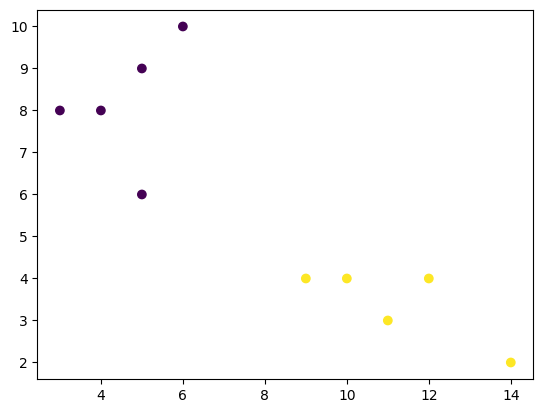

In [38]:
# Maak een scatterplot. Gebruik de parameter 'c' (color) om de kolom 'cluster' (dwz de voorspelde klantcategorie) de kleur van de punten te laten bepalen.
plt.scatter(
    dfsuper['diepvriespizza'], 
    dfsuper['hagelslag'], 
    c=kmeans.labels_)
plt.show()

Wat we zien, is dat als je de gegevens voor elke klant in een grafiek zet waarbij de positie van elke klant wordt bepaald door de waarde van twee variabelen, er duidelijk te onderscheiden groepen ontstaan, simpelweg door te kijken naar de waarde van die twee variabelen.

Dit werkt ook met drie, vijf of duizend variabelen. Je kunt het dan echter niet meer in een grafiek weergeven, vandaar dat we ons hier beperken tot twee. In de praktijk kun je echter zoveel variabelen gebruiken als je wil.

### 2.3.2 K-means clustering met echte data

De data die we zojuist hebben gebruikt, was speciaal gemaakt voor dit voorbeeld en liet zich dus gemakkelijk clusteren. Werk je met echte data, dan zijn de resultaten vaak lang niet zo netjes.

Gebruik de penguin-data om op basis van de kolommen culmen_length_mm en flipper_length_mm de soort te voorspellen:

1. Maak een nieuw KMeans-model met 3 clusters (er zijn drie soorten).
2. Train het (`fit`) op de kolommen 'culmen_length_mm' en 'flipper_length_mm'.
3. Plot het resultaat door een scatterplot te maken waarin je de kolommen 'culmen_length_mm' en 'flipper_length_mm' tegen elkaar afzet. Gebruik de clusters `je_kmeans_object.labels_` voor de kleur.

In [51]:
# Inlezen van penguin-data. 
if 'COLAB_GPU' in os.environ:
    dfpenguins = pd.read_csv("https://raw.githubusercontent.com/mcdejonge/beginnen_met_data_science/refs/heads/main/data/palmerpenguins/penguins_size_clean.csv")
else:
    dfpenguins = pd.read_csv("data/palmerpenguins/penguins_size_clean.csv")

In [78]:
# Plaats hier je eigen code


Om te kunnen beoordelen hoe goed het model het heeft gedaan, is wat gegoochel met matplotlib nodig. Het voert te ver om dat in deze cursus uit te leggen. Voorbeeldcode hiervoor vind je echter in de map "docent".

## 2.4 Decision trees

Een andere manier om data te classificeren is gebruikmaken van zogenoemde *Decision Trees* (*beslisbomen*). Een Decision Tree bestaat uit een reeks ja / nee-beslissingen die uiteindelijk leiden tot de keuze voor een bepaalde categorie.

Bijvoorbeeld: stel dat we willen weten met wat voor soort dier te maken we hebben. De decision tree ziet er dan uit als volgt:

<img src="img/decision_tree.png">

In [ ]:
# Inlezen van auto-data. 
if 'COLAB_GPU' in os.environ:
    dfcar = pd.read_csv("https://raw.githubusercontent.com/mcdejonge/beginnen_met_data_science/refs/heads/main/data/carseats/carseats.processed.csv")
else:
    dfcar = pd.read_csv("data/carseats/carseats.processed.csv")


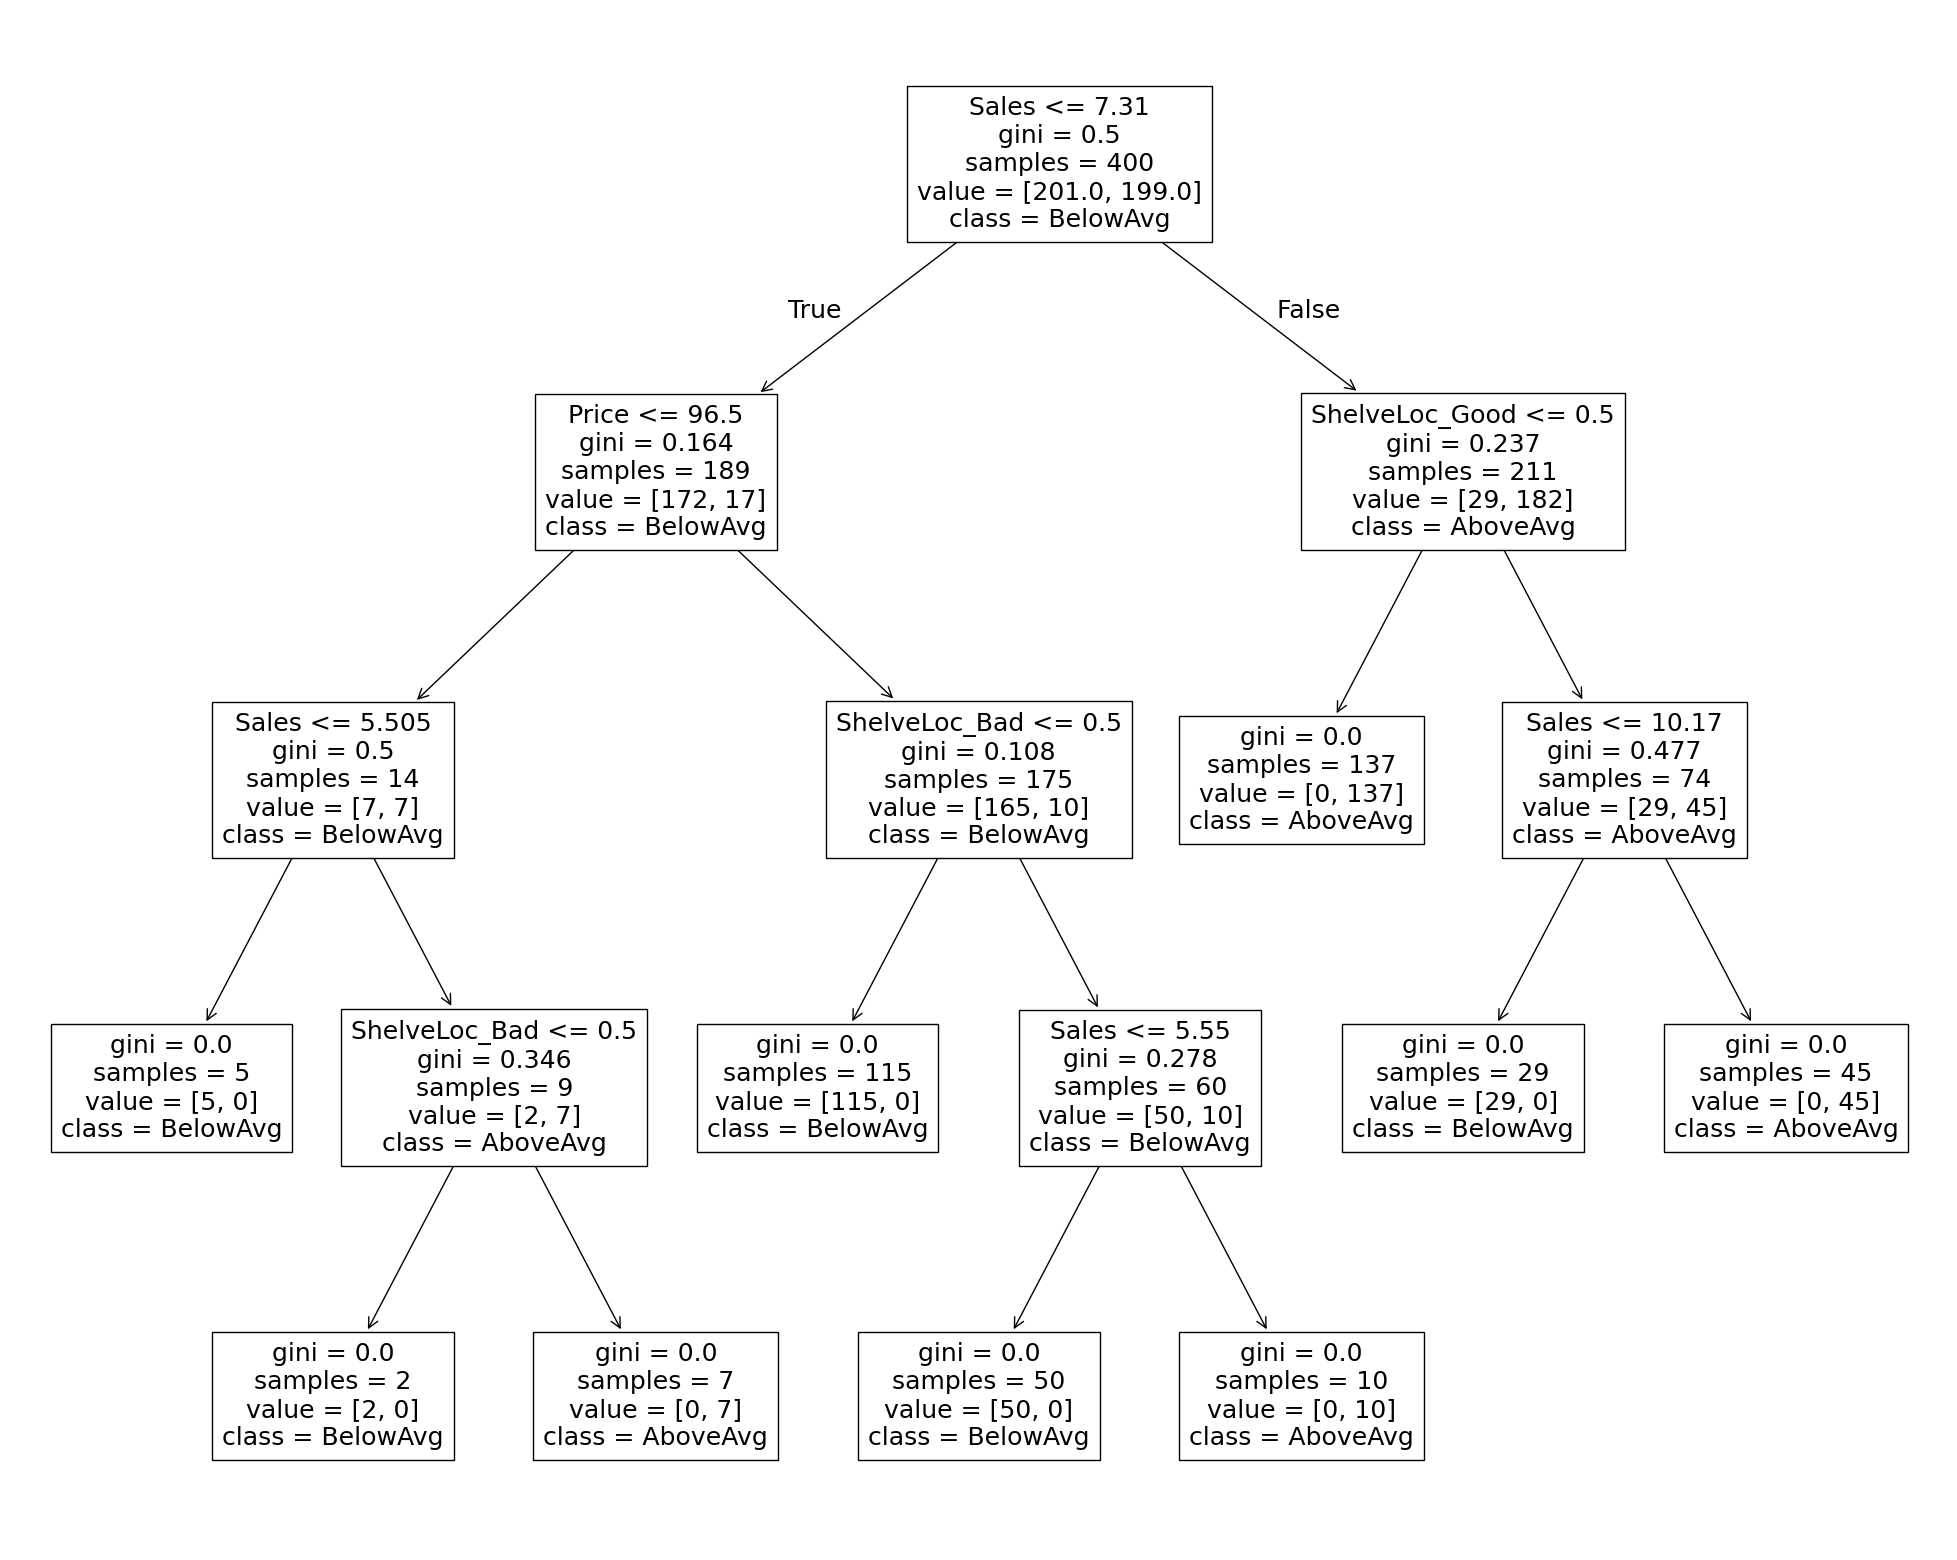

In [136]:

# Kolommen die worden gebruikt om de keuze te maken:
xcols = ['ShelveLoc_Bad',
         'ShelveLoc_Good',
         'ShelveLoc_Medium',
         'Urban_No',
         'Urban_Yes',
         'US_No',
         'US_Yes',
         'Sales',
         'CompPrice',
         'Income',
         'Advertising',
         'Population',
         'Price','Age',
         'Education']
# Kolom die voorspeld moet worden
ycol = 'Above_Below_Avg_Loc'

# Maak een tree met diepte 5
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(dfcar[xcols], dfcar[[ycol]])
plt.figure(figsize=(25,20))
plot_tree(tree,
          feature_names = xcols,
          class_names = ['BelowAvg', 'AboveAvg'])
plt.show()

## 2.5 Ensemble models


## Portfolio-opdracht